In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [6]:
def in_Range(hsv, lower_range, upper_range):
    height = hsv.shape[0]
    width = hsv.shape[1]
    channel = hsv.shape[2]
    l1, l2, l3 = lower_range
    u1, u2, u3 = upper_range
    mask = np.zeros((height,width,channel), dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            if hsv[i][j][0] >= l1 and hsv[i][j][1] >= l2 and hsv[i][j][2] >= l3 and hsv[i][j][0] <= u1 and hsv[i][j][1] <= u2 and hsv[i][j][2] <= u3:
                    mask[i][j][0] = hsv[i][j][0]
                    mask[i][j][1] = hsv[i][j][1]
                    mask[i][j][2] = hsv[i][j][2]
                    
    
    return mask

In [7]:
def bitwise_and(img, mask):
    #output = np.empty((img.shape[0], img.shape[1], img.shape[2]))
    output = np.bitwise_and( mask, img)
    return output

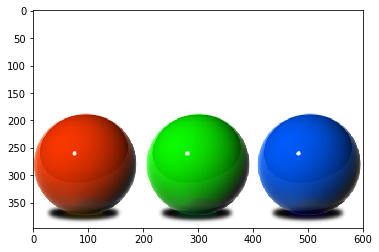

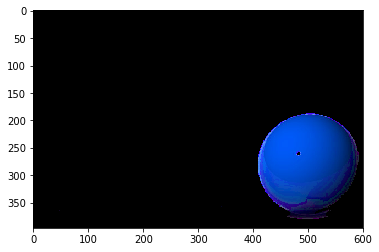

In [8]:
img = np.array(Image.open("mask.jpg"))
plt.imshow(img)
plt.show()
bgr = img.copy()
# to convert from RGB to BGR
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        bgr[i][j][2] = img[i][j][0]
        bgr[i][j][1] = img[i][j][1]
        bgr[i][j][0] = img[i][j][2]
        
hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)

# specifying range for blue colour which we want to detect
lower_range = np.array([105,33,33])
upper_range = np.array([140,255,255])

mask = in_Range(hsv, lower_range, upper_range)

output = np.bitwise_and(img, mask)
plt.imshow(output)
plt.show()
output = Image.fromarray(np.uint8(output))
output.save("Blue Ball Detected.png")